In [16]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder

In [17]:
data = pd.read_csv("C:\\Users\\Simon\\PycharmProjects\\NeuronaleNetze\\data\\stroke.csv")
data = data.drop("id",axis=1)
data = data.drop("bmi",axis=1)

#Modify categorical data
one_hot = pd.get_dummies(data['gender'],dtype="int")
data = data.drop('gender',axis = 1)
data = data.join(one_hot)

#Modify categorical data
one_hot = pd.get_dummies(data['work_type'],dtype="int")
data = data.drop('work_type',axis = 1)
data = data.join(one_hot)

one_hot = pd.get_dummies(data['smoking_status'],dtype="int")
data = data.drop('smoking_status',axis = 1)
data = data.join(one_hot)

#Modify String Column to Int
le = LabelEncoder()
data["ever_married"] = le.fit_transform(data["ever_married"])

#Modify String Column to Int
data["Residence_type"] = le.fit_transform(data["Residence_type"])


data = data.sample(frac = 1)
data.columns = data.columns.astype(str)
y = data["stroke"]
x = data.drop("stroke", axis=1)

enc = StandardScaler()
x = enc.fit_transform(x)

X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3)
print(X_train.shape)

(3577, 18)


In [18]:
#ML
model = Sequential()
model.add(Dense(units=13, input_shape=(18,), activation="relu"))
model.add(Dense(units=8, activation="relu"))
model.add(Dense(units=1, activation="sigmoid"))

model.compile(loss="binary_crossentropy", optimizer="adam", metrics="accuracy")

history = model.fit(X_train,y_train,epochs=25,batch_size=32,validation_split=0.2)

_,accuracy = model.evaluate(X_test,y_test)
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/25
90/90 [==============================] - 1s 4ms/step - loss: 0.6288 - accuracy: 0.6781 - val_loss: 0.4840 - val_accuracy: 0.9469
Epoch 2/25
90/90 [==============================] - 0s 3ms/step - loss: 0.3687 - accuracy: 0.9486 - val_loss: 0.2731 - val_accuracy: 0.9525
Epoch 3/25
90/90 [==============================] - 0s 2ms/step - loss: 0.2273 - accuracy: 0.9497 - val_loss: 0.2082 - val_accuracy: 0.9525
Epoch 4/25
90/90 [==============================] - 0s 2ms/step - loss: 0.1928 - accuracy: 0.9497 - val_loss: 0.1911 - val_accuracy: 0.9525
Epoch 5/25
90/90 [==============================] - 0s 2ms/step - loss: 0.1818 - accuracy: 0.9497 - val_loss: 0.1834 - val_accuracy: 0.9525
Epoch 6/25
90/90 [==============================] - 0s 2ms/step - loss: 0.1759 - accuracy: 0.9497 - val_loss: 0.1780 - val_accuracy: 0.9525
Epoch 7/25
90/90 [==============================] - 0s 2ms/step - loss: 0.1716 - accuracy: 0.9497 - val_loss: 0.1741 - val_accuracy: 0.9525
Epoch 8/25
90/90 [==

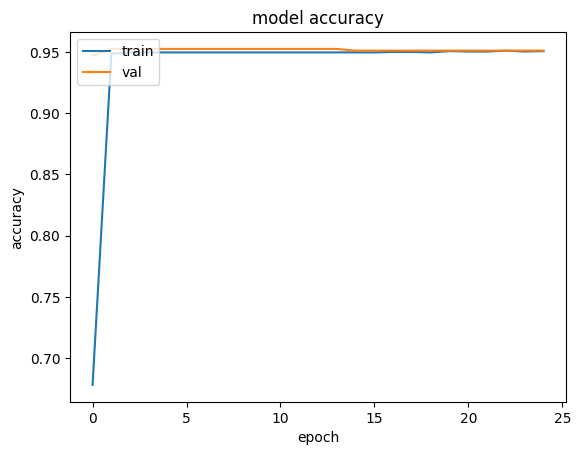

In [19]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

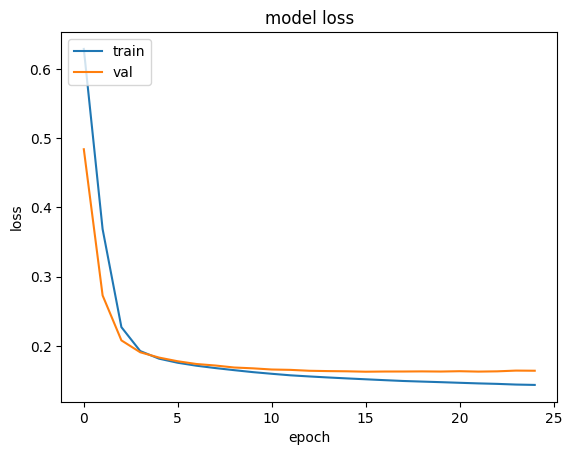

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()